<a href="https://colab.research.google.com/github/DLamarG/Data_Scientist_Salary_Analysis_World_Data/blob/main/zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of World Data Scientist Demographics

In this analysis, we delve into a comprehensive dataset containing information about salaries in the field of data science. The dataset encompasses various attributes such as job titles, salaries, currencies, experience levels, and employment types. Through this exploration, we aim to uncover trends, patterns, and insights that can provide valuable guidance for professionals and organizations in the data science domain. By scrutinizing the distribution of salaries, exploring relationships between different variables, and identifying key factors influencing compensation, this analysis seeks to offer actionable insights for individuals and businesses alike.

## Downloading the Dataset

In the code below, the dataset that will be used for this document, will be downloaded.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [7]:
# initializing variable for data collection
dataset_url = 'https://www.kaggle.com/datasets/zain280/data-science-salaries'

In [ ]:
# downloading the csv file with opendatasets
import opendatasets as od
od.download(dataset_url)

The dataset has been downloaded and extracted.

In [9]:
# Saving the csv to directory
data_dir = './data-science-salaries'

In [ ]:
import os
os.listdir(data_dir)

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "analysis-of-global-data-scientist-demographics" # project name

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)
jovian.commit(files=['ds_salaries.csv'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Data Preparation and Cleaning

**Summary of Functions and Methods**
- pandas
- type()
- .info()
- .describe()
- .columns
- .shape


In [ ]:
import pandas as pd
import os
print(os.getcwd())

In [ ]:
salaries_df = pd.read_csv('/content/data-science-salaries/ds_salaries.csv')

In [ ]:
# In the code below the "type" method is called on the salaries dataframe to obtain the objects classification
type(salaries_df)

pandas.core.frame.DataFrame

In [ ]:
# In the code below, the "info" method is called on the salaries dataframe to obtain some basic informaton about the dataframes contents (e.g. Dtype, null-count, column-count)
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
# In the code snippet below, the "describe" method for numpy arrays is utilized to obtain statistical information about the columns.
salaries_df.describe()

,id,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
# The code below will list all of the column header titles in the document
salaries_df.columns

Index(['id', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
#The code snippet below will creat a tuple containing the values of the number of rows, and the number of columns respectively.
salaries_df.shape

(607, 12)

In [ ]:
print(salaries_df)

      id  work_year experience_level employment_type  \
0      0       2020               MI              FT   
1      1       2020               SE              FT   
2      2       2020               SE              FT   
3      3       2020               MI              FT   
4      4       2020               SE              FT   
..   ...        ...              ...             ...   
602  602       2022               SE              FT   
603  603       2022               SE              FT   
604  604       2022               SE              FT   
605  605       2022               SE              FT   
606  606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Exploratory Analysis and Visualization

**5 Take-aways from this salary information for data scientist**
- Top Ten Job Titles
- Top Five Job Titles with Average Salaries
- Top Ten Global Data Science Job Titles and thier distribution among L-large, M-medium, and S-small companies
- Distribution of Salary ($USD) for Global Data Science Job Titles


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Weighted Distribution of Top Ten Global Data Science Job Titles:
The code below is utilized to create the dictionary for counting job titles

In [ ]:
unique_job_titles = salaries_df['job_title'].nunique()
all_job_titles = list(salaries_df['job_title'])
job_title_counts = {}

for num in all_job_titles:
      if num in job_title_counts:
        job_title_counts[num] +=1
      else:
        job_title_counts[num] = 1

The code below creates a pie chart of all job titles with relative percentages.

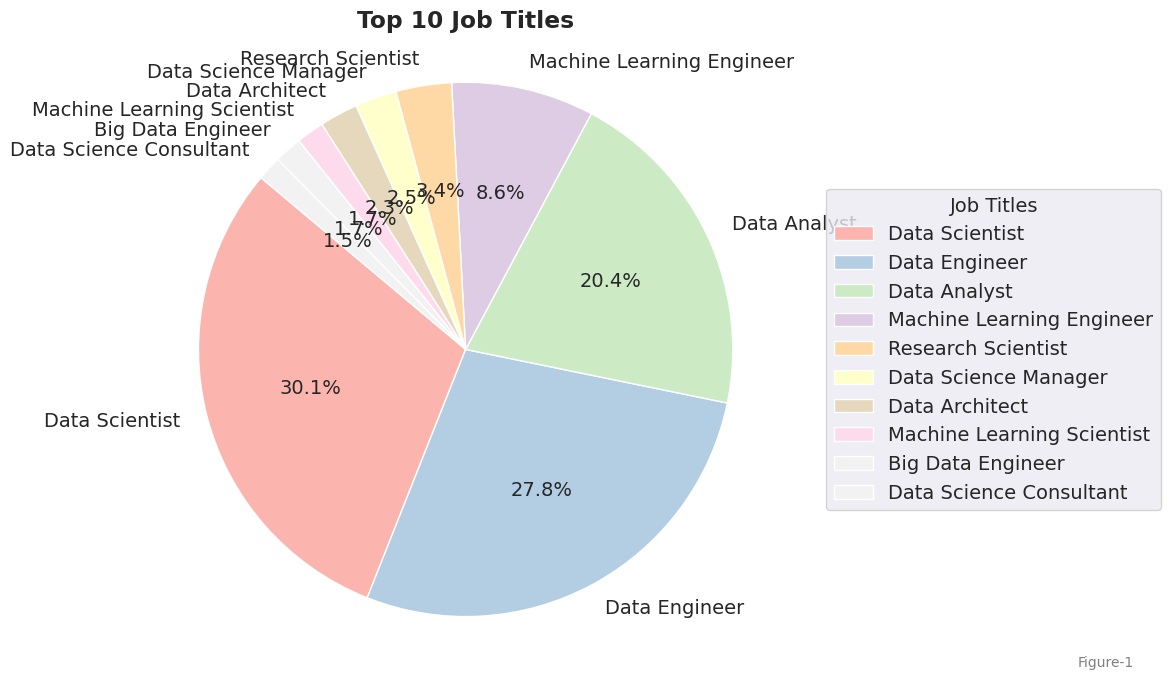

In [ ]:
job_counts = {'Data Scientist': 143, 'Machine Learning Scientist': 8, 'Big Data Engineer': 8, 'Product Data Analyst': 2, 'Machine Learning Engineer': 41, 'Data Analyst': 97, 'Lead Data Scientist': 3, 'Business Data Analyst': 5, 'Lead Data Engineer': 6, 'Lead Data Analyst': 3, 'Data Engineer': 132, 'Data Science Consultant': 7, 'BI Data Analyst': 6, 'Director of Data Science': 7, 'Research Scientist': 16, 'Machine Learning Manager': 1, 'Data Engineering Manager': 5, 'Machine Learning Infrastructure Engineer': 3, 'ML Engineer': 6, 'AI Scientist': 7, 'Computer Vision Engineer': 6, 'Principal Data Scientist': 7, 'Data Science Manager': 12, 'Head of Data': 5, '3D Computer Vision Researcher': 1, 'Data Analytics Engineer': 4, 'Applied Data Scientist': 5, 'Marketing Data Analyst': 1, 'Cloud Data Engineer': 2, 'Financial Data Analyst': 2, 'Computer Vision Software Engineer': 3, 'Director of Data Engineering': 2, 'Data Science Engineer': 3, 'Principal Data Engineer': 3, 'Machine Learning Developer': 3, 'Applied Machine Learning Scientist': 4, 'Data Analytics Manager': 7, 'Head of Data Science': 4, 'Data Specialist': 1, 'Data Architect': 11, 'Finance Data Analyst': 1, 'Principal Data Analyst': 2, 'Big Data Architect': 1, 'Staff Data Scientist': 1, 'Analytics Engineer': 4, 'ETL Developer': 2, 'Head of Machine Learning': 1, 'NLP Engineer': 1, 'Lead Machine Learning Engineer': 1, 'Data Analytics Lead': 1}

# Sorting the dictionary by counts (descending) and selecting the top 10
sorted_job_counts = dict(sorted(job_counts.items(), key=lambda item: item[1], reverse=True)[:10])

# Preparing pie chart data
labels = sorted_job_counts.keys()
sizes = sorted_job_counts.values()
colors = plt.cm.Pastel1(range(len(labels)))  # Using a colormap for varied colors

# Creating the pie chart
plt.figure(figsize=(11, 7))  # Adjust the size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Adding graph label
plt.text(2.5, -1.2, 'Figure-1', ha='right', va='bottom', fontsize=10, color='gray')

# Adding a legend
plt.legend(labels, title="Job Titles", loc="center left", bbox_to_anchor=(1, 0.5))

# Adding a title
plt.title('Top 10 Job Titles', fontweight='bold', pad=20)

# Displaying the pie chart
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()


**Figure-1**
The pie chart above displays the distribution of job titles related to data science.

## Average Salaries for Top Five Global Data Science Job Titles:



The code below creates a variable of top 5 job titles in data science industry

In [ ]:
# Define a dictionary for job roles and their corresponding salarie
# Define the job role
job_roles = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist']

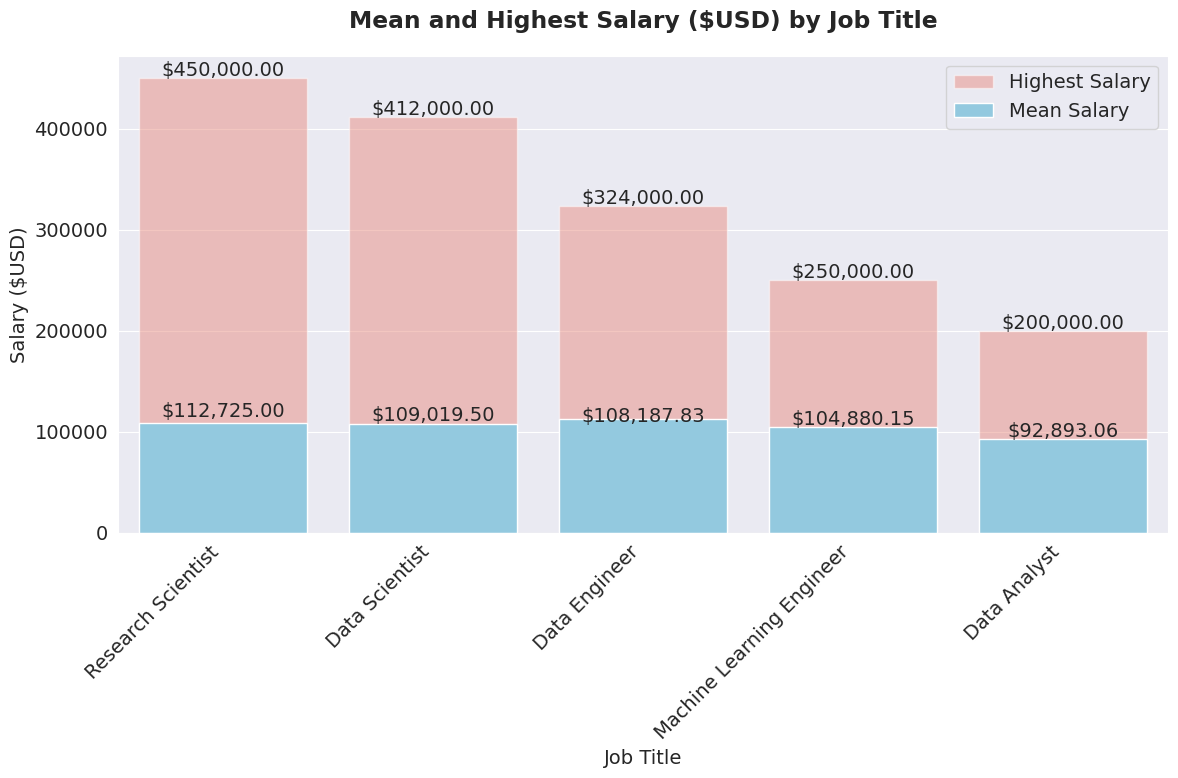

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame 'salaries_df'

# Listing job roles for which you want to calculate the mean salary
job_roles = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist']

# Filter the DataFrame to include only the specified job roles
filtered_df = salaries_df[salaries_df['job_title'].isin(job_roles)]

# Calculate the mean salary and highest salary for each job role
mean_salary = filtered_df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
highest_salary = filtered_df.groupby('job_title')['salary_in_usd'].max().sort_values(ascending=False)

# Create a new figure for the plot
plt.figure(figsize=(12, 8))

# Generate a second set of bars for highest salary
barplot_highest = sns.barplot(x=highest_salary.index, y=highest_salary.values, color='salmon', alpha=0.5, label='Highest Salary')

# Generate a bar plot using seaborn for mean salary
barplot_mean = sns.barplot(x=mean_salary.index, y=mean_salary.values, color='skyblue', label='Mean Salary')

# Add text annotations to the highest salary bars
for i in range(len(highest_salary)):
    barplot_highest.text(i, highest_salary[i] + 2000, '${:,.2f}'.format(highest_salary[i]), ha='center')

# Add text annotations to the mean salary bars
for i in range(len(mean_salary)):
    barplot_mean.text(i, mean_salary[i] + 2000, '${:,.2f}'.format(mean_salary[i]), ha='center')

# Add title and labels to the plot
plt.title('Mean and Highest Salary ($USD) by Job Title', fontweight='bold', pad=20)
plt.xlabel('Job Title')
plt.ylabel('Salary ($USD)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()



## Top Ten Global Data Science Job Titles and thier distribution among L-large, M-medium, and S-small companies:

The code below will do several things:
- Create variables containing the salaries for all companies under three labes (e.g. L-large, M-medium, S-small)
- Graph the top ten for each respective group
- Bar graph depicts the distribution of job titles for Large, Medium, and Small companies

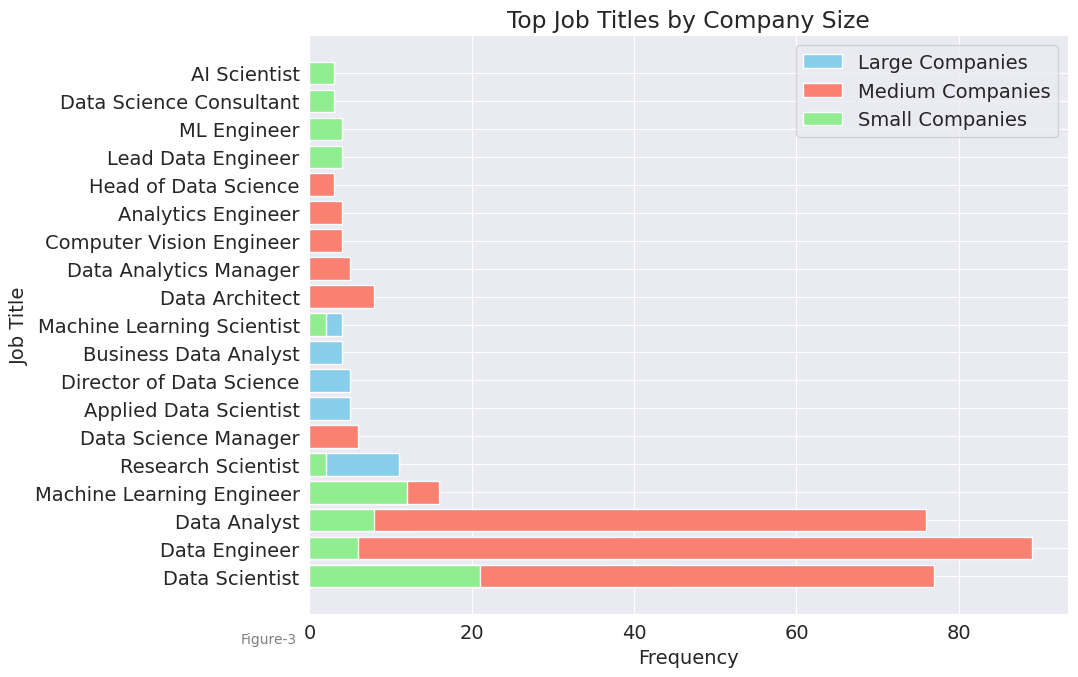

In [ ]:
# Filter the DataFrame for large (L), medium (M), and small (S) companies
large_companies = salaries_df[salaries_df['company_size'] == 'L']
medium_companies = salaries_df[salaries_df['company_size'] == 'M']
small_companies = salaries_df[salaries_df['company_size'] == 'S']

# Count the occurrences of each job title for large companies and get the top three
top_job_titles_large = large_companies['job_title'].value_counts().head(10)

# Count the occurrences of each job title for medium companies and get the top three
top_job_titles_medium = medium_companies['job_title'].value_counts().head(10)

# Count the occurrences of each job title for small companies and get the top three
top_job_titles_small = small_companies['job_title'].value_counts().head(10)

# Create a figure and axis for the plot
plt.figure(figsize=(11, 7))

# Plot the top job titles for large companies
plt.barh(top_job_titles_large.index, top_job_titles_large.values, color='skyblue', label='Large Companies')

# Plot the top job titles for medium companies
plt.barh(top_job_titles_medium.index, top_job_titles_medium.values, color='salmon', label='Medium Companies')

# Plot the top job titles for small companies
plt.barh(top_job_titles_small.index, top_job_titles_small.values, color='lightgreen', label='Small Companies')

# Graph title
plt.text(-1.5, -2.5, 'Figure-3', ha='right', va='bottom', fontsize=10, color='gray')

# Add title and labels to the plot
plt.title('Top Job Titles by Company Size')
plt.xlabel('Frequency')
plt.ylabel('Job Title')

# Add legend
plt.legend()

plt.tight_layout()

**Figure-3** - Top 10 job titles dipicted for large, medium, and small companies.

## Distribution of Salary ($USD) for Global Data Science Job Titles:

The code below creates a histogram of the salary distribution for data science job titles globaly.

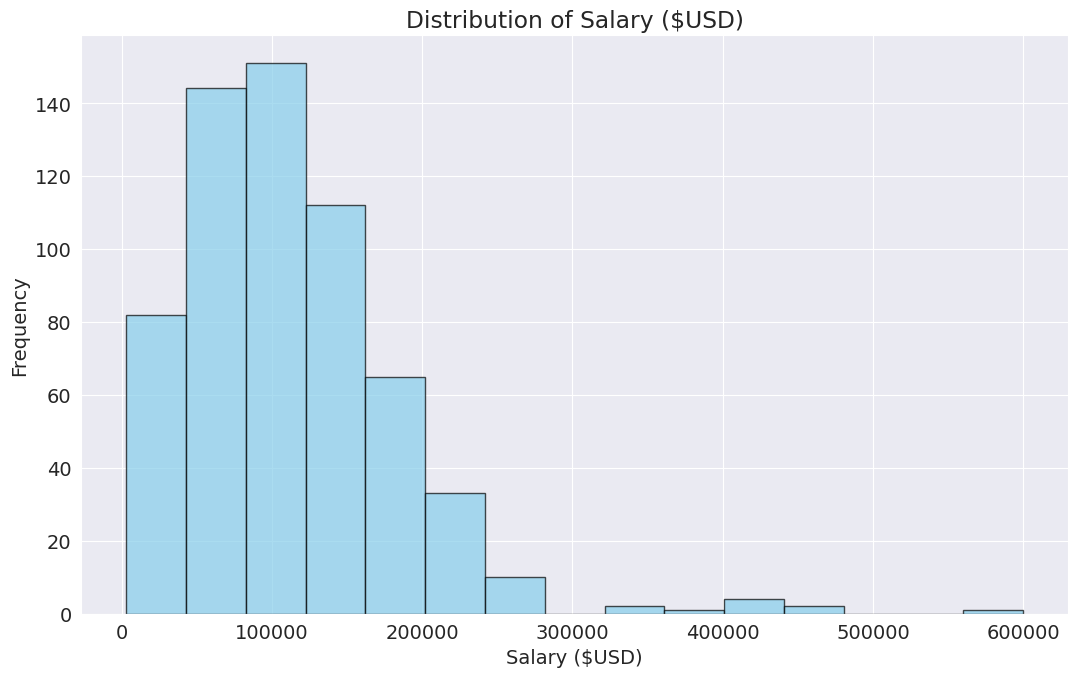

In [ ]:
# Create a histogram with Matplotlib
plt.figure(figsize=(11, 7))
plt.hist(salaries_df['salary_in_usd'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)

# Add title and labels to the plot
plt.title('Distribution of Salary ($USD)')
plt.xlabel('Salary ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.tight_layout()

**Figure-4** - Distribution of salary ranges in ($USD) for global data science job titles.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Asking and Answering Questions

Below are 5 questions that a viewer might want to know about this salary data:
- What percentage of respondants work remotely?
- What are the least five common job titles?
- How many respondants were (EN) entry-level experienced data science workers at the time of survey?
- When was this data collected?
- What percentage of respondancts worked FT (full-time) positions?


#### Q1: What percentage of respondants worked remotely?

In [ ]:
import pandas as pd

df = pd.DataFrame(salaries_df)

# Calculate the count of each unique value in the 'remote_ratio' column
remote_ratio_counts = df['remote_ratio'].value_counts()

# Calculate the percentage of each unique value
remote_ratio_percentage = remote_ratio_counts / len(df) * 100

# Display the percentage of each 'remote_ratio' category
print(remote_ratio_percentage)

100    62.76771
0      20.92257
50     16.30972
Name: remote_ratio, dtype: float64


#### Q2: What were the least five common job titles during this survey?

In [ ]:
df = pd.DataFrame(salaries_df)

# Count the occurrences of each job title
job_title_counts = df['job_title'].value_counts()

# Find the least five common job titles
least_common_titles = job_title_counts.nsmallest(5)

print(least_common_titles)

Lead Machine Learning Engineer    1
NLP Engineer                      1
Head of Machine Learning          1
3D Computer Vision Researcher     1
Data Specialist                   1
Name: job_title, dtype: int64


#### Q3: How many respondants were (EN) entry-level experienced data science workers at the time of survey?



In [ ]:
# Count of entry-level ('EN') entries
en_count = df.loc[df['experience_level'] == 'EN'].shape[0]

# Total count of entries
total_count = df.shape[0]

# Calculate the percentage
en_percentage = (en_count / total_count) * 100

print(f"Percentage of entry-level ('EN') entries: {en_percentage:.2f}%")


Percentage of entry-level ('EN') entries: 14.50%


#### Q4: When was this data collected?

In [ ]:
year_range = df['work_year'].agg(['min', 'max'])
print(f"The range of years for 'work_year' is from {year_range['min']} to {year_range['max']}.")


The range of years for 'work_year' is from 2020 to 2022.


#### Q5: What percentage of respondancts worked FT (full-time) positions?

In [ ]:
# Count of part-time ('PT') employment_type entries
pt_count = df[df['employment_type'] == 'FT'].shape[0]

# Total count of entries
total_count = df.shape[0]

# Calculate the percentage
pt_percentage = (pt_count / total_count) * 100

print(f"Percentage of part-time ('FT') workers: {pt_percentage:.2f}%")


Percentage of part-time ('FT') workers: 96.87%


Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Inferences and Conclusion

The analysis of the salaries dataset revealed valuable insights into the compensation trends across various job roles in the field of data science. With mean salaries calculated for specific job titles, it's evident that roles like Data Scientist and Machine Learning Engineer command higher compensation. Further exploration could involve investigating regional salary variations or correlating experience levels with salary ranges to provide a comprehensive understanding of the factors influencing data science salaries.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

The dataset under examination primarily revolves around salary information within the tech industry, capturing variables such as work year, experience level, employment type, job title, and salary (both in original currency and USD), among others. Analysis thus far has delved into understanding the distribution of salaries in USD through histogram visualizations, exploring the mean and highest salaries across different job titles, and investigating the remote work distribution and experience levels within the dataset. Additionally, insights regarding employment types, with a specific focus on part-time roles, and the temporal range of the dataset have been unearthed, highlighting trends and patterns across the years.

For future analysis, one promising direction could involve a deeper exploration into the relationship between remote work ratios and salary levels, potentially uncovering how remote work preferences or requirements affect compensation across different regions and job titles. Another interesting avenue could entail a predictive modeling approach, aiming to forecast salary trends based on variables such as experience level, job title, and company size, which could provide valuable insights for both job seekers and employers in the tech industry.

## References:

1. "Data Science Salaries 2023 Kaggle Dataset 💸: Unveiling Salary Trends: Key Findings from the Data Science Salaries 2023 Dataset"

2. https://www.w3schools.com/python/python_for_loops.asp

3. https://www.geeksforgeeks.org/python-seaborn-tutorial/

In [ ]:
import jovian

In [ ]:
jovian.commit()